In [1]:
from maskRCNN.pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from maskRCNN import visualize_815 as visualize
import torch

In [153]:
EPIC_MODEL_PATH = '/vision2/u/cy3/exp/rcnn/0819/coco20180820T0146/mask_rcnn_coco_0040.pth'

In [149]:
torch.cuda.current_device()
torch.cuda.device(0)
print("#gpus:{}".format(torch.cuda.device_count()))
print("device_name is {}".format(torch.cuda.get_device_name(0)))

#gpus:2
device_name is GeForce GTX TITAN X


In [154]:
from maskRCNN import coco as cocomask
from maskRCNN import model_feats as modellib
import torch.nn as nn
import torch.utils.data as data

class InferenceConfig(cocomask.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    # GPU_COUNT = 0 for CPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 352

    # added by BB
    dataset = 'epic'
    visualize = True


config = InferenceConfig()
config.display()

# Create model object.
model = modellib.MaskRCNN(model_dir=EPIC_MODEL_PATH, config=config)
if config.dataset == 'epic':
    # model finetuned on EPIC
    model.mask.conv5 = nn.Conv2d(256, config.NUM_CLASSES, kernel_size=1, stride=1)
    model.classifier.linear_class = nn.Linear(1024, config.NUM_CLASSES)
    model.classifier.linear_bbox = nn.Linear(1024, config.NUM_CLASSES * 4)

if config.GPU_COUNT:
    model = model.cuda()

# Load weights trained on MS-COCO
if config.dataset == 'coco':
    print("Loading weights from", COCO_MODEL_PATH)
    model.load_state_dict(torch.load(COCO_MODEL_PATH))
elif config.dataset == 'epic':
    print("Loading weights from", EPIC_MODEL_PATH)
    model.load_state_dict(torch.load(EPIC_MODEL_PATH))
else:
    raise NotImplementedError('Currently only support dataset COCO or EPIC; got "{}"'.format(config.dataset))


Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.3
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGENET_MODEL_PATH            /sailhome/cy3/code/pytorch-mask-rcnn/playground/resnet50_imagenet.pth
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                  

/sailhome/cy3/code/pytorch-mask-rcnn/playground/maskRCNN/model_feats.py:1540: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight)


Loading weights from /vision2/u/cy3/exp/rcnn/0819/coco20180820T0146/mask_rcnn_coco_0040.pth


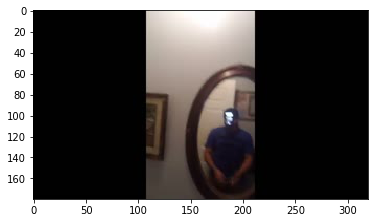

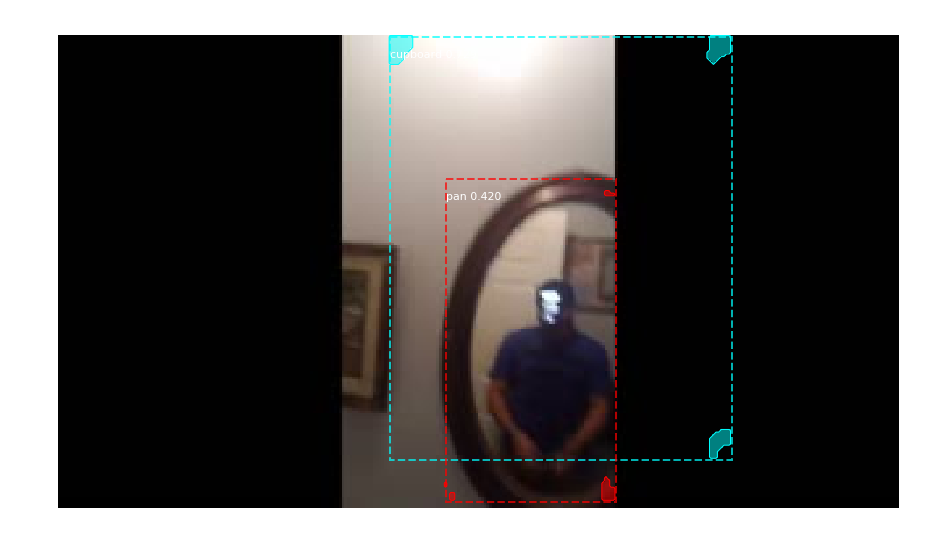

In [183]:
%matplotlib inline
#im_path = '/vision2/u/cy3/data/CharadesEgo/CharadesEgo_v1_rgb/005BUEGO/005BUEGO-000786.jpg'
#im_path = '/sailhome/cy3/vision2/data/CharadesEgo/CharadesEgo_v1_rgb/ZWU5CEGO/ZWU5CEGO-000150.jpg'
imgid, fid = 'MMW4JEGO', 250
imgid, fid = 'BBWIYEGO', 500
imgid, fid = 'XPBD3EGO', 750
imgid, fid = '7FSMKEGO', 600
imgid, fid = 'MQN7QEGO', 400
imgid, fid = 'CLE5TEGO', 100
imgid, fid = '8JYH5EGO', 200
imgid, fid = '2HJU8EGO', 200
imgid, fid = 'VF0HDEGO', 700 # dining room
imgid, fid = 'PYQSNEGO', 300 # bathroom
im_path = '/vision2/u/cy3/data/CharadesEgo/CharadesEgo_v1_rgb/{}/{}-000{}.jpg'.format(imgid, imgid, fid)
I = io.imread(im_path)
plt.imshow(I)
plt.show()
results = model.detect([I])[0]
disp_masks = results['masks']
visualize.display_instances(I, results['rois'], disp_masks, results['class_ids'],
                                        class_names, results['scores'])

In [6]:
class_names = ["BG", "Nothing", "pan", "pan:dust", "tap", "plate", "knife", "bowl", "spoon", "cupboard", "drawer",
               "fridge", "lid", "hand", "onion", "onion:spring", "pot", "glass", "water", "fork", "board:chopping",
               "bag", "sponge", "spatula", "cup", "oil", "bin", "meat", "potato", "bottle", "container",
               "tomato", "salt", "cloth", "sink", "door:kitchen", "pasta", "dish:soap", "food", "kettle", "box",
               "carrot", "sauce", "colander", "milk", "rice", "garlic", "pepper", "hob", "dough", "dishwasher",
               "egg", "cheese", "bread", "table", "salad", "microwave", "oven", "cooker:slow", "coffee", "filter",
               "jar", "rack:drying", "chicken", "tray", "mixture", "towel", "towel:kitchen", "peach", "skin",
               "courgette",
               "liquid:washing", "liquid", "leaf", "lettuce", "leaf:mint", "cutlery", "scissors", "package", "top",
               "spice",
               "tortilla", "paper", "machine:washing", "olive", "sausage", "glove:oven", "peeler:potato", "can", "mat",
               "mat:sushi",
               "vegetable", "wrap:plastic", "wrap", "flour", "cucumber", "curry", "cereal", "napkin", "soap", "squash",
               "fish", "chilli", "cover", "sugar", "aubergine", "jug", "heat", "leek", "rubbish", "ladle",
               "mushroom", "stock", "freezer", "light", "pizza", "ball", "yoghurt", "chopstick", "grape", "ginger",
               "banana", "oregano", "tuna", "kitchen", "salmon", "basket", "maker:coffee", "roll", "brush", "lemon",
               "clothes", "grater", "strainer", "bacon", "avocado", "blueberry", "pesto", "utensil", "bean:green",
               "floor",
               "lime", "foil", "grill", "ingredient", "scale", "paste:garlic", "processor:food", "nut:pine", "butter",
               "butter:peanut",
               "shelf", "timer", "rinse", "tablecloth", "switch", "powder:coconut", "powder:washing", "capsule", "oat",
               "tofu",
               "lighter", "corn", "vinegar", "grinder", "cap", "support", "cream", "content", "tongs", "pie",
               "fan:extractor", "raisin", "toaster", "broccoli", "pin:rolling", "plug", "button", "tea", "parsley",
               "flame",
               "herb", "base", "holder:filter", "thyme", "honey", "celery", "kiwi", "tissue", "time", "clip",
               "noodle", "yeast", "hummus", "coconut", "cabbage", "spinach", "nutella", "fruit", "dressing:salad",
               "omelette",
               "kale", "paella", "chip", "opener:bottle", "shirt", "chair", "sandwich", "burger:tuna", "pancake",
               "leftover",
               "risotto", "pestle", "sock", "pea", "apron", "juice", "wine", "dust", "desk", "mesh",
               "oatmeal", "artichoke", "remover:spot", "coriander", "mocha", "quorn", "soup", "turmeric", "knob",
               "seed",
               "boxer", "paprika", "juicer:lime", "guard:hand", "apple", "tahini", "finger", "salami", "mayonnaise",
               "biscuit",
               "pear", "mortar", "berry", "beef", "squeezer:lime", "tail", "stick:crab", "supplement", "phone",
               "shell:egg",
               "pith", "ring:onion", "cherry", "cake", "sprout", "almond", "mint", "flake:chilli", "cutter:pizza",
               "nesquik",
               "blender", "scrap", "backpack", "melon", "breadcrumb", "sticker", "shrimp", "smoothie", "grass:lemon",
               "ketchup",
               "slicer", "stand", "dumpling", "watch", "beer", "power", "heater", "basil", "cinnamon", "crisp",
               "asparagus", "drink", "fishcakes", "mustard", "caper", "whetstone", "candle", "control:remote",
               "instruction", "cork",
               "tab", "masher", "part", "muffin", "shaker:pepper", "garni:bouquet", "popcorn", "envelope", "chocolate",
               "spot",
               "window", "syrup", "bar:cereal", "croissant", "coke", "stereo", "alarm", "recipe", "handle", "sleeve",
               "cumin", "wire", "label", "fire", "presser", "air", "mouse", "boiler", "rest", "tablet",
               "poster", "trousers", "form", "rubber", "rug", "sheets", "pepper:cayenne", "waffle", "pineapple",
               "turkey",
               "alcohol", "rosemary", "lead", "book", "rim", "gravy", "straw", "hat", "cd", "slipper",
               "casserole", "ladder", "jambalaya", "wall", "tube", "lamp", "tarragon", "heart", "funnel", "whisk",
               "driver:screw", "trouser"]

In [196]:
import csv
def parse_charades_csv(filename):
    labels = {}
    scenes = {}
    with open(filename) as f:
        reader = csv.DictReader(f)
        for row in reader:
            vid = row['id']
            actions = row['actions']
            scene = row['scene']
            if actions == '':
                actions = []
            else:
                actions = [a.split(' ') for a in actions.split(';')]
                actions = [{'class': x, 'start': float(
                    y), 'end': float(z)} for x, y, z in actions]
            labels[vid] = {'actions': actions, 'scene': scene}
            if scene not in scenes:
                scenes[scene] = 1
            else:
                scenes[scene] += 1
    print('number of videos by scenes: {}'.format(scenes))
    return labels

In [197]:
labels = parse_charades_csv('/vision2/u/cy3/data/CharadesEgo/CharadesEgo_v1_train_only1st.csv')

number of videos by scenes: {'Closet / Walk-in closet / Spear closet': 88, 'Living room': 568, 'Home Office / Study (A room in a house used for work)': 130, 'Bathroom': 200, 'Bedroom': 674, 'Dining room': 167, 'Entryway (A hall that is generally located at the entrance of a house)': 149, 'Kitchen': 593, 'Laundry room': 94, 'Other': 38, 'Stairs': 115, 'Hallway': 114, 'Recreation room / Man cave': 40, 'Pantry': 60, 'Garage': 34, 'Basement (A room below the ground floor)': 20}


In [201]:
accs = [0.343263, 0.369479, 0.401969, 0.419570, 0.411191, 0.448105, 0.421795]
accs = np.array(accs)
print(np.mean(accs))
print(np.std(accs))

0.402196
0.03255341783679776
